<a href="https://colab.research.google.com/github/WhiskeyMaDawg/SC1015_DataScience_Project/blob/main/Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Classification**

**(Note: Data Cleaning and EDA were included for reference. Random Forest ML was done after those sections)**


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from google.colab import files
import io
sb.set() # set the default Seaborn style for graphics

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
songdf = pd.read_csv('gdrive/My Drive/SpotifyFinalAPI.csv')
songdf.head()

Mounted at /content/gdrive


,track_id,track_name_x,popularity,track_uri,artist_name,artist_popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


# **Data Prepartion and Cleaning**


In [ ]:
# checking the size of the dataframe
print("Data dimensions : ", songdf.shape)
print(songdf.dtypes)

Data dimensions :  (791, 18)
track_id              object
track_name_x          object
popularity             int64
track_uri             object
artist_name           object
artist_popularity      int64
artist_genres         object
album                 object
track_name_y          object
danceability         float64
energy               float64
tempo                float64
loudness             float64
valence              float64
speechiness          float64
instrumentalness     float64
liveness             float64
acousticness         float64
dtype: object


###**Renaming the column names**

In [ ]:
# Renaming the column names
songdf = songdf.rename(columns={"track_name_x":"title", "track_artist": "artist", "track_popularity":"popularity", "duration_ms":"duration_min", "artist_popularity":"artist popularity"})
songdf.head()

,track_id,title,popularity,track_uri,artist_name,artist popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


In [ ]:
song2df = songdf
song2df.head()

,track_id,title,popularity,track_uri,artist_name,artist popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


### **Change Categorical Variables from numeric to category**

In [ ]:
#Check
"""
song2df.drop("speech", axis=1, inplace=True) 
song2df.drop("instrumental", axis=1, inplace=True) 
song2df.drop("live performance", axis=1, inplace=True) 

"""

'\nsong2df.drop("speech", axis=1, inplace=True) \nsong2df.drop("instrumental", axis=1, inplace=True) \nsong2df.drop("live performance", axis=1, inplace=True) \n\n'

In [ ]:
speechiness_cat = pd.cut(song2df.speechiness,bins=[0,0.33,0.66,1.0],labels=['Words','Mix','Music'])
song2df.insert(8,'speech', speechiness_cat) 
song2df.drop(columns=["speechiness"], axis=1)

bins =[-np.inf,0.5,1]
instrumentalness_cat = pd.cut(song2df.instrumentalness,bins,labels=['Vocal', 'No Vocals'])
song2df.insert(11,'instrumental', instrumentalness_cat)


bins =[-np.inf,0.8,1]
live_performance = pd.cut(song2df.liveness,bins,labels=['No', 'Yes'])
song2df.insert(13,'live performance', live_performance)

newSongDf = song2df.drop(columns=["speechiness", "instrumentalness", "liveness"], axis=1)

### **Reorder columns for better viewing**

In [ ]:
#shift popularity (response) to the back for better viewing
tp = newSongDf.pop("popularity")
newSongDf["popularity"] = tp
newSongDf.head(5)

,track_id,title,track_uri,artist_name,artist popularity,artist_genres,album,speech,track_name_y,danceability,instrumental,energy,live performance,tempo,loudness,valence,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Words,Shape of You,0.825,Vocal,0.652,No,95.977,-3.183,0.931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Words,Blinding Lights,0.514,Vocal,0.730,No,171.005,-5.934,0.334,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Words,Dance Monkey,0.826,Vocal,0.593,No,98.083,-6.401,0.541,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,Words,rockstar (feat. 21 Savage),0.585,Vocal,0.520,No,159.801,-6.136,0.129,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Words,Someone You Loved,0.501,Vocal,0.405,No,109.891,-5.679,0.446,0.75100,90


### **Change popularity to categorical for decision tree**
Popular: Above 80
<br>
Not popular: Below 80

In [ ]:
#Check
#newSongDf.drop('popularity categorical', axis=1,inplace=True)

In [ ]:
bins =[-np.inf,80,100]
popularity_cat = pd.cut(newSongDf.popularity,bins,labels=['Not Popular', 'Popular'])
newSongDf.insert(15,'popularity_categorical', popularity_cat)

In [ ]:
#shift popularity (response) to the back for better viewing
pc = newSongDf.pop("popularity_categorical")
newSongDf["popularity_categorical"] = pc
newSongDf.head(5)


,track_id,title,track_uri,artist_name,artist popularity,artist_genres,album,speech,track_name_y,danceability,instrumental,energy,live performance,tempo,loudness,valence,acousticness,popularity,popularity_categorical
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Words,Shape of You,0.825,Vocal,0.652,No,95.977,-3.183,0.931,0.58100,89,Popular
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Words,Blinding Lights,0.514,Vocal,0.730,No,171.005,-5.934,0.334,0.00146,95,Popular
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Words,Dance Monkey,0.826,Vocal,0.593,No,98.083,-6.401,0.541,0.68800,68,Not Popular
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,Words,rockstar (feat. 21 Savage),0.585,Vocal,0.520,No,159.801,-6.136,0.129,0.12400,88,Popular
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Words,Someone You Loved,0.501,Vocal,0.405,No,109.891,-5.679,0.446,0.75100,90,Popular


In [ ]:
newSongDf['popularity_categorical'].value_counts()

Not Popular    398
Popular        393
Name: popularity_categorical, dtype: int64

### **Extract Numerical and Categorical Data***




In [ ]:
songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity','popularity']])
songNumData

,danceability,energy,loudness,acousticness,valence,tempo,artist popularity,popularity
0,0.825,0.652,-3.183,0.58100,0.931,95.977,96,89
1,0.514,0.730,-5.934,0.00146,0.334,171.005,97,95
2,0.826,0.593,-6.401,0.68800,0.541,98.083,78,68
3,0.585,0.520,-6.136,0.12400,0.129,159.801,91,88
4,0.501,0.405,-5.679,0.75100,0.446,109.891,82,90
...,...,...,...,...,...,...,...,...
786,0.790,0.647,-5.983,0.05150,0.654,87.999,96,87
787,0.851,0.551,-5.177,0.15100,0.807,131.922,65,76
788,0.359,0.543,-7.582,0.49200,0.453,68.534,98,87
789,0.471,0.924,-3.906,0.00301,0.725,154.961,71,85


In [ ]:
newSongDf.iloc[90]

track_id                                             1EzrEOXmMH3G43AXT1y7pA
title                                                             I'm Yours
track_uri                              spotify:track:1EzrEOXmMH3G43AXT1y7pA
artist_name                                                      Jason Mraz
artist popularity                                                        77
artist_genres             ['acoustic pop', 'neo mellow', 'pop', 'pop rock']
album                                   We Sing. We Dance. We Steal Things.
speech                                                                Words
track_name_y                                                      I'm Yours
danceability                                                          0.703
instrumental                                                          Vocal
energy                                                                0.444
live performance                                                         No
tempo       

In [ ]:
songCatData = pd.DataFrame(newSongDf[['speech', 'instrumental']])
songCatData = songCatData.astype('category')
songCatData.describe()

,speech,instrumental
count,791,791
unique,2,2
top,Words,Vocal
freq,763,786


#**EDA and Removing Outliers**

In [ ]:
#songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity','popularity']])
songNumData.describe()

,danceability,energy,loudness,acousticness,valence,tempo,artist popularity,popularity
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.664961,0.648631,-6.245063,0.203684,0.496515,119.201456,84.298357,72.091024
std,0.140562,0.172123,2.342916,0.234137,0.226602,26.232928,8.073679,24.627284
min,0.209000,0.111000,-18.435000,0.000025,0.059200,64.934000,59.000000,0.000000
25%,0.582500,0.537000,-7.358000,0.028900,0.330500,99.043500,79.000000,74.000000
50%,0.677000,0.672000,-5.833000,0.110000,0.478000,117.993000,85.000000,80.000000
75%,0.762500,0.783000,-4.723000,0.291500,0.669500,135.063500,91.000000,85.000000
max,0.967000,0.988000,-1.190000,0.978000,0.979000,205.846000,100.000000,97.000000


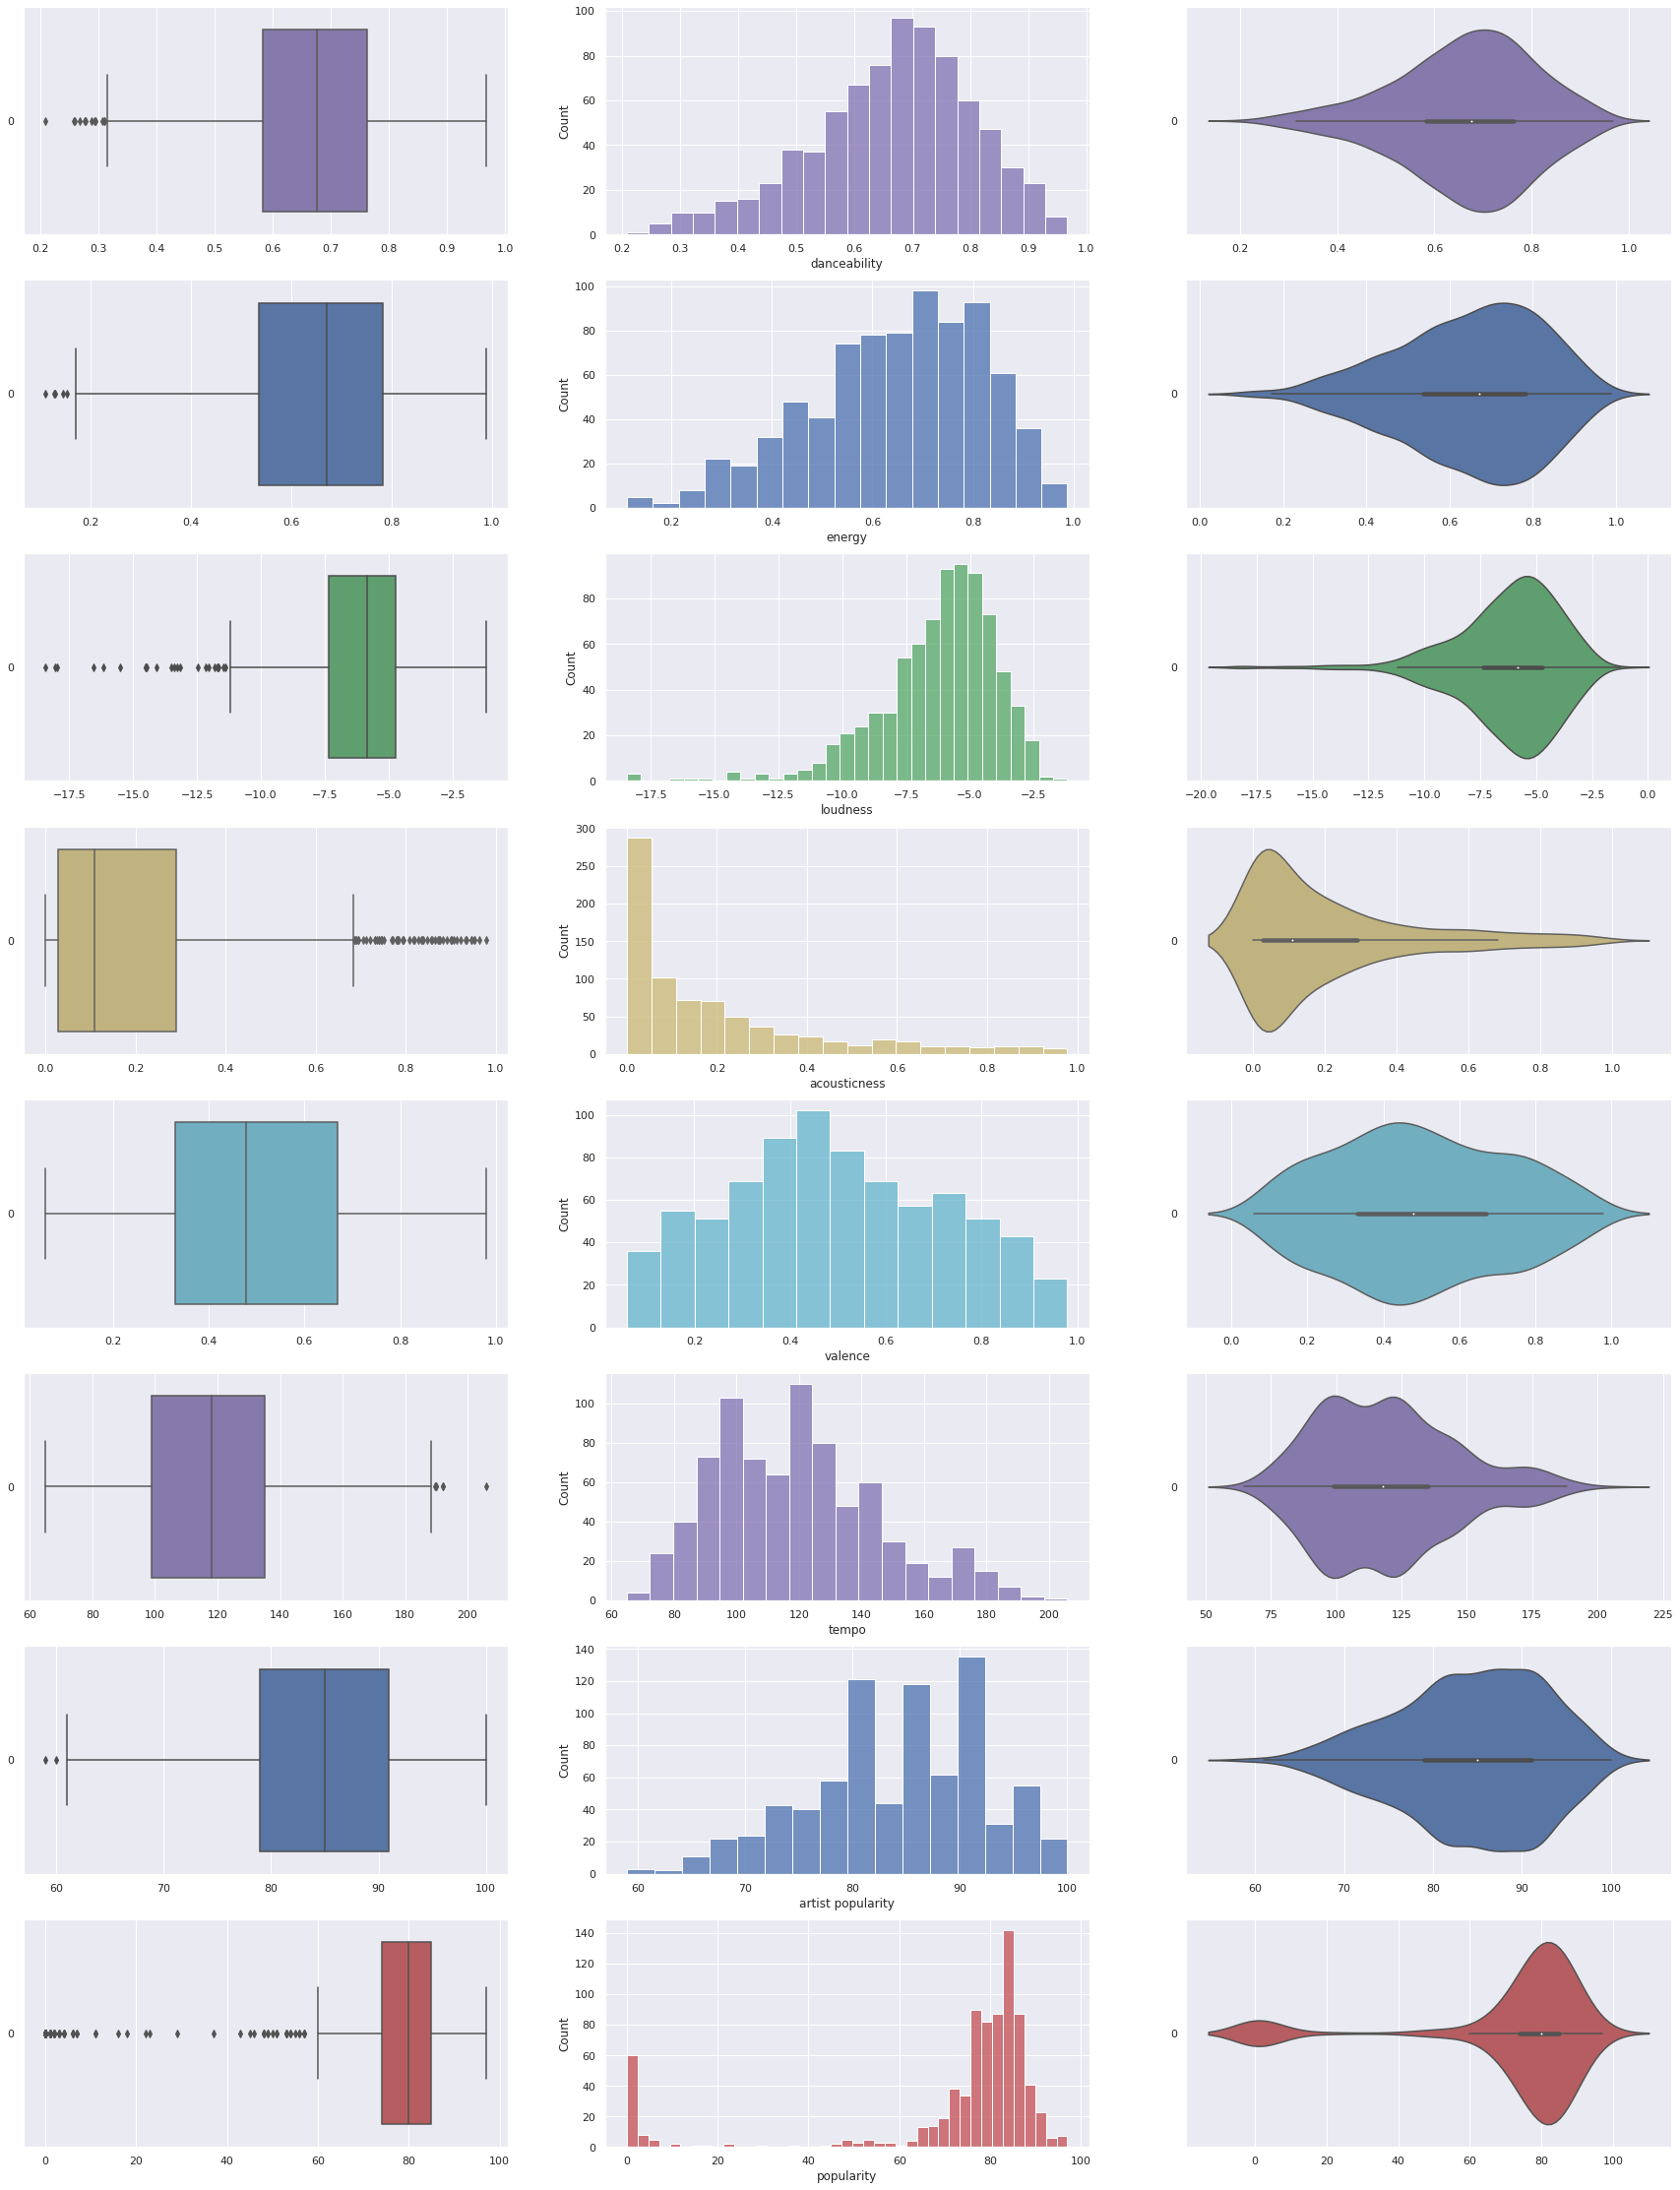

In [ ]:
f, axes = plt.subplots(8, 3, figsize=(30, 40))
colours = ['m', 'b', 'g', 'y','c','m','b','r']

count = 0
for var in songNumData:
    sb.boxplot(data = songNumData[var], orient = "h", ax = axes[count,0], color=colours[count])
    sb.histplot(data = songNumData[var], ax = axes[count,1], color=colours[count])
    sb.violinplot(data = songNumData[var], orient = "h", ax = axes[count,2], color=colours[count])
    count += 1

## **Remove Outliers: Popularity**

### The distribution of values in the sample of popularity seems Gaussian-like, so we used the IQR of the sample as a cut-off for identifying outliers.

In [ ]:
#Calculate Mean and IQR
mean_popularity = songNumData['popularity'].mean()
Q1 = songNumData['popularity'].quantile(0.25)
Q3 = songNumData['popularity'].quantile(0.75)
IQR = Q3 - Q1
print("Mean: ", mean_popularity)
print("IQR: ", IQR)

#Calculate outliers (if data<(Q1-1.5*IQR) or data>(Q3+1.5*IQR))
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
print("Upper bound: ", upper)
print("Lower bound:", lower)

Mean:  72.09102402022756
IQR:  11.0
Upper bound:  101.5
Lower bound: 57.5


###**Remove outliers according to the upper and lower bound**

In [ ]:
# Rule to identify outliers
rule = ((songNumData['popularity'] < lower) | (songNumData['popularity']  >  upper))

# Count the number of outliers
print("Number of outliers in popularity:")
rule.sum()

Number of outliers in popularity:


103

In [ ]:
# Indices or rows corresponding to outleirs
outlierindices = rule.index[rule == True]
outlierindices

Int64Index([  5,   6,   9,  15,  27,  39,  43,  45,  48,  51,
            ...
            475, 482, 544, 551, 567, 602, 609, 610, 678, 775],
           dtype='int64', length=103)

In [ ]:
# Remove the outliers based on the row indices obtained above
newSongDf.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
newSongDf

,track_id,title,track_uri,artist_name,artist popularity,artist_genres,album,speech,track_name_y,danceability,instrumental,energy,live performance,tempo,loudness,valence,acousticness,popularity,popularity_categorical
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Words,Shape of You,0.825,Vocal,0.652,No,95.977,-3.183,0.931,0.58100,89,Popular
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Words,Blinding Lights,0.514,Vocal,0.730,No,171.005,-5.934,0.334,0.00146,95,Popular
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Words,Dance Monkey,0.826,Vocal,0.593,No,98.083,-6.401,0.541,0.68800,68,Not Popular
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,Words,rockstar (feat. 21 Savage),0.585,Vocal,0.520,No,159.801,-6.136,0.129,0.12400,88,Popular
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Words,Someone You Loved,0.501,Vocal,0.405,No,109.891,-5.679,0.446,0.75100,90,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,4EWCNWgDS8707fNSZ1oaA5,Heartless,spotify:track:4EWCNWgDS8707fNSZ1oaA5,Kanye West,96,"['chicago rap', 'rap']",808s & Heartbreak,Words,Heartless,0.790,Vocal,0.647,No,87.999,-5.983,0.654,0.05150,87,Popular
787,67iAlVNDDdddxqSD2EZhFs,I'm Gonna Be (500 Miles),spotify:track:67iAlVNDDdddxqSD2EZhFs,The Proclaimers,65,"['celtic rock', 'scottish rock']",Sunshine on Leith,Words,I'm Gonna Be (500 Miles),0.851,Vocal,0.551,No,131.922,-5.177,0.807,0.15100,76,Not Popular
788,1dGr1c8CrMLDpV6mPbImSI,Lover,spotify:track:1dGr1c8CrMLDpV6mPbImSI,Taylor Swift,98,['pop'],Lover,Words,Lover,0.359,Vocal,0.543,No,68.534,-7.582,0.453,0.49200,87,Popular
789,2iUmqdfGZcHIhS3b9E9EWq,Everybody Talks,spotify:track:2iUmqdfGZcHIhS3b9E9EWq,Neon Trees,71,"['modern alternative rock', 'modern rock', 'po...",Picture Show,Words,Everybody Talks,0.471,Vocal,0.924,No,154.961,-3.906,0.725,0.00301,85,Popular


## **Visualise plot after removing outliers**

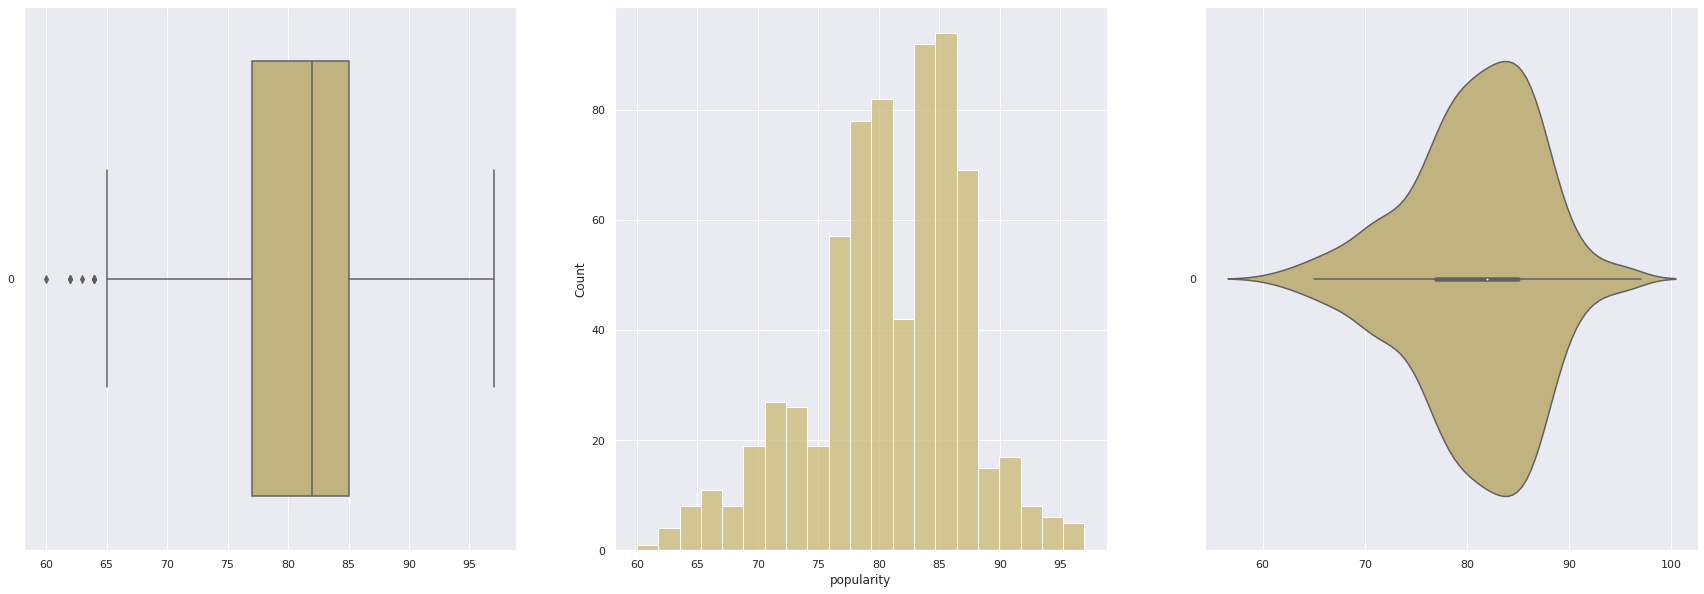

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(30, 10))
songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity','popularity']])
sb.boxplot(data = songNumData['popularity'], orient = "h", ax = axes[0], color='y')
sb.histplot(data = songNumData['popularity'], ax = axes[1], color='y')
sb.violinplot(data = songNumData['popularity'], orient = "h", ax = axes[2], color='y')

# **Prepare the same OHE data as the decision tree classification**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors 
# Recall that songCatData = pd.DataFrame(newSongDf[['speech', 'instrumental']])

ohe.fit(songCatData)
song_cat_ohe = pd.DataFrame(ohe.transform(songCatData).toarray(), 
                                  columns=ohe.get_feature_names_out(songCatData.columns))

# Check the encoded variables
song_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   speech_Mix              791 non-null    float64
 1   speech_Words            791 non-null    float64
 2   instrumental_No Vocals  791 non-null    float64
 3   instrumental_Vocal      791 non-null    float64
dtypes: float64(4)
memory usage: 24.8 KB


### **Combine numerical data with the OHE categorical variables**

In [ ]:
#Recall that numerical data are stored in songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity']])

# Extrat songNumData after removing outleirs
songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity','popularity']])

# Extract response variable
popularity_response = newSongDf['popularity_categorical']
songData_ohe = pd.concat([songNumData, song_cat_ohe, popularity_response], 
                           sort = False, axis = 1).reindex(index=songNumData.index)

# Check the final dataframe
songData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 790
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   danceability            688 non-null    float64 
 1   energy                  688 non-null    float64 
 2   loudness                688 non-null    float64 
 3   acousticness            688 non-null    float64 
 4   valence                 688 non-null    float64 
 5   tempo                   688 non-null    float64 
 6   artist popularity       688 non-null    float64 
 7   popularity              688 non-null    float64 
 8   speech_Mix              688 non-null    float64 
 9   speech_Words            688 non-null    float64 
 10  instrumental_No Vocals  688 non-null    float64 
 11  instrumental_Vocal      688 non-null    float64 
 12  popularity_categorical  688 non-null    category
dtypes: category(1), float64(12)
memory usage: 86.8 KB


In [ ]:
songData_ohe

,danceability,energy,loudness,acousticness,valence,tempo,artist popularity,popularity,speech_Mix,speech_Words,instrumental_No Vocals,instrumental_Vocal,popularity_categorical
0,0.825,0.652,-3.183,0.58100,0.931,95.977,96.0,89.0,0.0,1.0,0.0,1.0,Popular
1,0.514,0.730,-5.934,0.00146,0.334,171.005,97.0,95.0,0.0,1.0,0.0,1.0,Popular
2,0.826,0.593,-6.401,0.68800,0.541,98.083,78.0,68.0,0.0,1.0,0.0,1.0,Not Popular
3,0.585,0.520,-6.136,0.12400,0.129,159.801,91.0,88.0,0.0,1.0,0.0,1.0,Popular
4,0.501,0.405,-5.679,0.75100,0.446,109.891,82.0,90.0,0.0,1.0,0.0,1.0,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,0.790,0.647,-5.983,0.05150,0.654,87.999,96.0,87.0,0.0,1.0,0.0,1.0,Popular
787,0.851,0.551,-5.177,0.15100,0.807,131.922,65.0,76.0,0.0,1.0,0.0,1.0,Not Popular
788,0.359,0.543,-7.582,0.49200,0.453,68.534,98.0,87.0,0.0,1.0,0.0,1.0,Popular
789,0.471,0.924,-3.906,0.00301,0.725,154.961,71.0,85.0,0.0,1.0,0.0,1.0,Popular


# **Model 3: Random Forest Classification**
Given the accurancy in decision tree is not so well, lets try another tree classifier, known as the Random Forest.  

Random Forest, like its name implies, consisits of a large number of individual decision trees that operates as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model's prediction. 
 
The essense of Random Forest is such that  
####_"A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models"_  

## Forest with 100 trees and depth 10

In [ ]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songData_ohe['popularity_categorical'])
X = pd.DataFrame(songData_ohe.drop(['popularity_categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.popularity_categorical.ravel())      

RandomForestClassifier(max_depth=10)

### **Check the accuracy of the Model**

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data
Accuracy  :	 0.9945454545454545

TPR Train :	 0.9937304075235109
TNR Train :	 0.9956709956709957

FPR Train :	 0.004329004329004329
FNR Train :	 0.006269592476489028


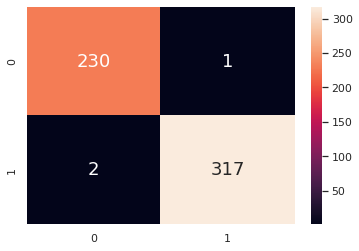

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5797101449275363

TPR Test :	 0.6756756756756757
TNR Test :	 0.46875

FPR Test :	 0.53125
FNR Test :	 0.32432432432432434


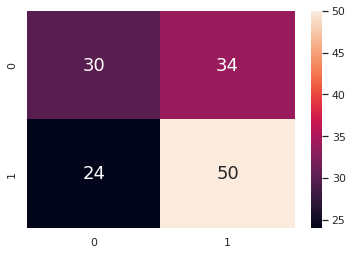

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

The result of the first `random forest` is not really as high as we expected.  

There are two major parameters which is called the *hyper-parameter* of Random Forest are `n_estimators` (the number of decision trees in the forest) and `max_depth` (depth of each decision tree in the forest).  

We can try modifying the two parameters and see how the results change.  

###**Increase the number of decision trees in the forest**  
We increase the number of decision trees in the forest, `n_estimators = 1000` while keeping the `max-depth` constant.

In [ ]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songData_ohe['popularity_categorical'])
X = pd.DataFrame(songData_ohe.drop(['popularity_categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.popularity_categorical.ravel())      

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.9981818181818182

TPR Train :	 0.9968652037617555
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.003134796238244514


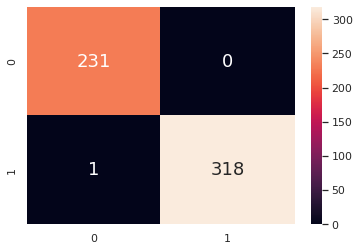

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

This amount of trees seem to make our train data overfit due to the amount of decision trees. It forces the model to completely fit the training data and might fail to recognise the important generalized patterns.

Test Data
Accuracy  :	 0.5797101449275363

TPR Test :	 0.7162162162162162
TNR Test :	 0.421875

FPR Test :	 0.578125
FNR Test :	 0.28378378378378377


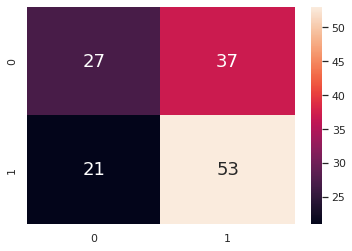

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

The result is about the same, perhaps increasing the number of decision trees by ten fold is not the best move.

###**Increase the depth of decision trees in the forest**  
We increase the depth in the forest, `max_depth = 20` while keeping the `n_estimators` constant.



In [ ]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songData_ohe['popularity_categorical'])
X = pd.DataFrame(songData_ohe.drop(['popularity_categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.popularity_categorical.ravel())

RandomForestClassifier(max_depth=20)

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


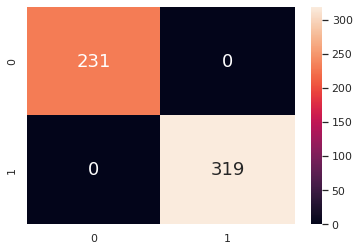

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5434782608695652

TPR Test :	 0.6351351351351351
TNR Test :	 0.4375

FPR Test :	 0.5625
FNR Test :	 0.36486486486486486


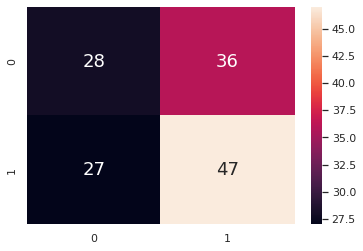

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

The result is still about the same, we didnt see any improvement by increasing the number of decision trees and the depth alone.

###**Increase both the number and the depth of decision trees in the forest**  
We increase both the number of decision trees and the depth in the forest, `max_depth = 20` while keeping the `n_estimators = 1000` constant.


In [ ]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songData_ohe['popularity_categorical'])
X = pd.DataFrame(songData_ohe.drop(['popularity_categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 20)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.popularity_categorical.ravel())

RandomForestClassifier(max_depth=20, n_estimators=1000)

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


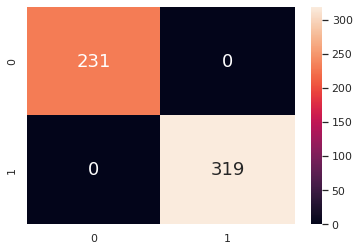

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5652173913043478

TPR Test :	 0.7027027027027027
TNR Test :	 0.40625

FPR Test :	 0.59375
FNR Test :	 0.2972972972972973


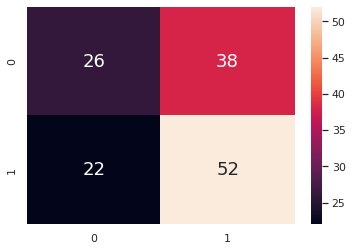

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

With more number of trees and deeper trees in the forest, the accuracy of the Random Forest is getting better on the train data but the test data remains about the same. Note that the gap between the performance on train and test is increasing too. This is a sign of over-fitting, whereby there is a low rate of error in the train data but a high rate of error in the test data, defeating the purpose of predicting.   

We will need to find the optimal hyper-parameters to maximize accuracy of the classifier on the test set in general. Also note that we are only trying out a single `train_test_split`, and it is impossible to predict the *generalized* performance of the model from a single run. Thus, we will need to run this multiple times, with randomized train and test sets, to get a better estimate. Both of these targets are achieved through Cross-Validation techniques, whereby you can optimize the hyper-parameters of a model.

###**Cross-validation & Tuning of the Hyperparameter**

In [ ]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songData_ohe['popularity_categorical'])                               # Responder
X = pd.DataFrame(songData_ohe.drop(['popularity_categorical','popularity'], axis = 1)) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

In [ ]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.popularity_categorical.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=7, n_estimators=600)
0.6363636363636365


###**using the optimal hyper-parameter**  
We set the `max_depth = 7` while keeping the `n_estimators = 600`

In [ ]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songData_ohe['popularity_categorical'])
X = pd.DataFrame(songData_ohe.drop(['popularity_categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 600,  # n_estimators denote number of trees
                                 max_depth = 7)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.popularity_categorical.ravel())

RandomForestClassifier(max_depth=7, n_estimators=600)

Train Data
Accuracy  :	 0.9381818181818182

TPR Train :	 0.9686520376175548
TNR Train :	 0.8961038961038961

FPR Train :	 0.1038961038961039
FNR Train :	 0.03134796238244514


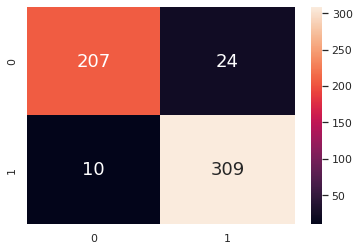

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5869565217391305

TPR Test :	 0.7432432432432432
TNR Test :	 0.40625

FPR Test :	 0.59375
FNR Test :	 0.25675675675675674


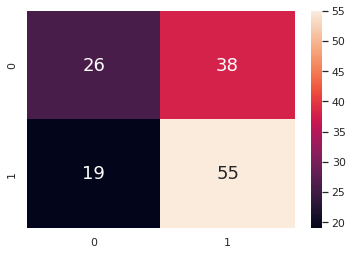

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

We can see that even tuning the random forest to the optimal hyper-parameter, this is the best result we can get even though it is not a significant improvement from the previous few forest. However, we can see that given the training data is not as overfit as the previous few, we achieve higher test data accuracy than the previous few forests.

##**Determine Feature Importance in Decision Tree**

Calculate which was the most important feature used in the decision tree. Note that the attribute **feature_importances_** returns the feature importances in an 
arrary of values

In [ ]:
rforest.feature_importances_

array([0.10149574, 0.17558159, 0.13473941, 0.12624648, 0.12788462,
       0.10684707, 0.21006003, 0.00323121, 0.0038272 , 0.00535299,
       0.00473365])

In [ ]:
#Extract all the features data i.e. drop the 'popularity categorical' & 'popularity' (response) column
features = songData_ohe.copy()
features.drop('popularity_categorical', axis=1, inplace=True)
features.drop('popularity', axis=1, inplace=True)
songData_ohe.columns
features.columns

Index(['danceability', 'energy', 'loudness', 'acousticness', 'valence',
       'tempo', 'artist popularity', 'speech_Mix', 'speech_Words',
       'instrumental_No Vocals', 'instrumental_Vocal'],
      dtype='object')

In [ ]:
#Create a new dataframe showing importance of features
featuresdf = pd.DataFrame({'Features':features.columns,'Feature_Importance':rforest.feature_importances_})
features_sort = featuresdf.sort_values(by='Feature_Importance', ascending=False)

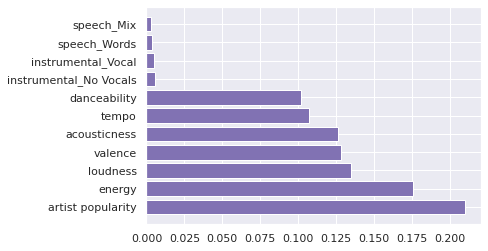

In [ ]:
plt.barh(features_sort['Features'], features_sort['Feature_Importance'], color='m')
plt.show()

##**Multi-variate Decision Tree Using top 3 factors**

As seen, the top 3 factors are artist popularity, energy and loudness

In [ ]:
top3_factor = pd.DataFrame(newSongDf[['energy','loudness','artist popularity','acousticness','popularity']])

# Extract response variable
# popularity_response = newSongDf['popularity categorical']
songData_top3 = pd.concat([top3_factor, popularity_response], 
                           sort = False, axis = 1).reindex(index=songNumData.index)

# Check the final dataframe
songData_top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 790
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   energy                  688 non-null    float64 
 1   loudness                688 non-null    float64 
 2   artist popularity       688 non-null    int64   
 3   acousticness            688 non-null    float64 
 4   popularity              688 non-null    int64   
 5   popularity_categorical  688 non-null    category
dtypes: category(1), float64(3), int64(2)
memory usage: 49.2 KB


In [ ]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(songData_top3['popularity_categorical'])
X = pd.DataFrame(songData_top3.drop(['popularity_categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 600,  # n_estimators denote number of trees
                                 max_depth = 7)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.popularity_categorical.ravel())

RandomForestClassifier(max_depth=7, n_estimators=600)

Train Data
Accuracy  :	 0.9272727272727272

TPR Train :	 0.9623824451410659
TNR Train :	 0.8787878787878788

FPR Train :	 0.12121212121212122
FNR Train :	 0.03761755485893417


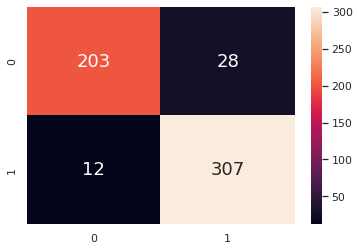

In [ ]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5869565217391305

TPR Test :	 0.7162162162162162
TNR Test :	 0.4375

FPR Test :	 0.5625
FNR Test :	 0.28378378378378377


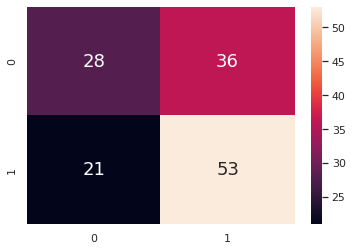

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

The result is similar to the optimal hyper-parameter forest. We can see that even if we drop some of the attributes, it didnt really affect our prediction. This could possibly tell us that our data are not strong enough to determine the connection between popularity and the different attributes, and the result is dominated by some of the few 'important' attributes only.